# Model "time to patient death" from the Clean EHR dataset

In [1]:
# basic imports
import os
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
pd.set_option('max_rows',2000)
pd.set_option('max_columns',500)

## 1 - Loading the data and creating an extended table

The first thing done is to look for the folders containing the data and loding it into a readable format. In this case, a simple read_csv operation from pandas is necessary to load the data (__data parsing__)

In [2]:
# data directory
data_folder = "../../cleanEHR/data"
results_folder = "results"

# demographic and time series data (from R script)
dt = pd.read_csv(os.path.join(data_folder,"anon_public_demographic.csv"))
dts = pd.read_csv(os.path.join(data_folder,"anon_public_timeseries.csv"))

In [3]:
# demografic data
dt.head()

,ICNNO,bed02,bed03,bed05,bed50,NHSNO,pasno,ADNO,DOB,PCODE,GPCODE,ETHNIC,SEX,HCM,HCMEST,WKG,WKGEST,DAH,DAICU,DWFRD,TWFRD,DDICU,DUDICU,DDH,DUDH,UDIS,RESA,HLOCA,LOCA,PA_V3,SCODE,CLASSNS,CCL2D,CCL3D,RDIS_V3,LOCD,TNESSD,LEVD,DIS,DOAH,SOHA,PLOCA,TUADNO,DOAICU,TUIDI,TYPEIHA,TGA,CCA,DLCCA,HLOCD,SOHD,TYPEIHD,TGD,HDIS,CCD,DFCCD,DESTH_V3,RESD,UHDIS,PSP,CPR_V3,RAICU1,RAICU2,URAICU,CHEMOX,RADIOX,CICIDS,AMLALLMM,CMLCLL,LYM,META,CRRX,BPC,HE,PH,AIDS_V3,HV,SRD,STERX,VSCD,OCPMH,DEP,apache_score,apache_prob,TNESSA,DHRS,AMUAI,ORGAN_SUPPORT,ARSD,BRSD,ACSD,BCSD,RSD,NSD,LSD,DSD,GSD,ITW_V3,DTW,TTW,BSDTP,DDBSD,TDBSD,DOD,TOD,REFOD,OD_V3,DBRICU,TBRICU,pid,spell,index
0,pseudo_site,NaN,NaN,5.0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,F,150.0,N,48.0,N,1969-12-31,1970-01-01T01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,A,I,P,300.0,NaN,2.0,4.0,NaN,NaN,NaN,NaN,D,1969-11-24,N,NaN,NaN,NaN,262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N,NaN,2.3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,2.1.2,N,25.0,NaN,T,NaN,0.0,3.0,0.0,3.0,0.0,6.0,4.0,0.0,2.0,0.0,5.0,H,NaN,NaN,0,NaN,NaN,1970-01-05,00:30,0.0,N,1970-01-05,01:40,11,14,1
1,pseudo_site,NaN,NaN,5.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,F,NaN,N,80.0,N,1969-12-31,1970-01-01T01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,A,I,U,192.0,NaN,0.0,17.0,NaN,NaN,NaN,NaN,D,1969-12-30,N,NaN,NaN,NaN,274.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N,2.1.4,2.1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.12.1,A,18.0,NaN,T,NaN,1.0,4.0,17.0,0.0,1.0,16.0,16.0,0.0,2.0,0.0,16.0,W,1970-01-16,11:45,0,NaN,NaN,1970-01-16,12:00,0.0,N,1970-01-16,14:20,14,20,2
2,pseudo_site,NaN,NaN,5.0,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,M,175.0,Y,70.0,Y,1969-12-31,1970-01-01T01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,S,S,L,320.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,D,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,C,2.4.2,2.2.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,NaN,0.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,W,1969-12-31,16:30,0,NaN,NaN,1969-12-31,18:13,1.0,N,1969-12-31,20:00,39,53,3
3,pseudo_site,NaN,NaN,5.0,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,M,NaN,N,90.0,N,1969-12-31,1970-01-01T01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,S,S,L,300.0,NaN,0.0,2.0,NaN,NaN,NaN,NaN,D,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,C,2.2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1.1,A,31.0,0.862356,T,NaN,0.0,3.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,W,1970-01-01,15:05,0,NaN,NaN,1970-01-01,15:30,1.0,N,1970-01-01,19:00,40,54,4
4,pseudo_site,NaN,NaN,5.0,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,M,NaN,N,75.0,N,1969-12-31,1970-01-01T01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,S,E,L,300.0,NaN,0.0,3.0,NaN,NaN,NaN,NaN,D,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,C,2.4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2.12,A,30.0,0.844093,T,NaN,0.0,4.0,3.0,0.0,3.0,0.0,2.0,3.0,0.0,0.0,2.0,N,NaN,NaN,0,NaN,NaN,1970-01-02,19:58,1.0,N,1970-01-03,00:34,45,59,5


In [4]:
# time series data
dts.head()

,ADNO,h_rate_mean,h_rate_std,h_rate_last,h_rate_mean_tail_diff,h_rhythm_mean,h_rhythm_std,h_rhythm_last,h_rhythm_mean_tail_diff,bp_m_a_mean,bp_m_a_std,bp_m_a_last,bp_m_a_mean_tail_diff,bp_m_ni_mean,bp_m_ni_std,bp_m_ni_last,bp_m_ni_mean_tail_diff,bp_sys_a_mean,bp_sys_a_std,bp_sys_a_last,bp_sys_a_mean_tail_diff,bp_sys_ni_mean,bp_sys_ni_std,bp_sys_ni_last,bp_sys_ni_mean_tail_diff,bp_dia_a_mean,bp_dia_a_std,bp_dia_a_last,bp_dia_a_mean_tail_diff,bp_dia_ni_mean,bp_dia_ni_std,bp_dia_ni_last,bp_dia_ni_mean_tail_diff,venous_p_mean,venous_p_std,venous_p_last,venous_p_mean_tail_diff,lidco_plus_mean,lidco_plus_std,lidco_plus_last,lidco_plus_mean_tail_diff,lidco_rapid_mean,lidco_rapid_std,lidco_rapid_last,lidco_rapid_mean_tail_diff,picco_mean,picco_std,picco_last,picco_mean_tail_diff,pa_catheter_mean,pa_catheter_std,pa_catheter_last,pa_catheter_mean_tail_diff,doppler_mean,doppler_std,doppler_last,doppler_mean_tail_diff,lactate_abg_mean,lactate_abg_std,lactate_abg_last,lactate_abg_mean_tail_diff,lactate_lab_mean,lactate_lab_std,lactate_lab_last,lactate_lab_mean_tail_diff,venous_saturation_mean,venous_saturation_std,venous_saturation_last,venous_saturation_mean_tail_diff,airway_mean,airway_std,airway_last,airway_mean_tail_diff,spo2_mean,spo2_std,spo2_last,spo2_mean_tail_diff,sao2_abg_mean,sao2_abg_std,sao2_abg_last,sao2_abg_mean_tail_diff,pao2_abg_mean,pao2_abg_std,pao2_abg_last,pao2_abg_mean_tail_diff,paco2_abg_mean,paco2_abg_std,paco2_abg_last,paco2_abg_mean_tail_diff,ph_abg_vbg_mean,ph_abg_vbg_std,ph_abg_vbg_last,ph_abg_vbg_mean_tail_diff,hco3_abg_vbg_mean,hco3_abg_vbg_std,hco3_abg_vbg_last,hco3_abg_vbg_mean_tail_diff,temperature_central_mean,temperature_central_std,temperature_central_last,temperature_central_mean_tail_diff,temperature_non_central_mean,temperature_non_central_std,temperature_non_central_last,temperature_non_central_mean_tail_diff,position_mean,position_std,position_last,position_mean_tail_diff,ventilation_mean,ventilation_std,ventilation_last,ventilation_mean_tail_diff,respiratory_rate_totl_mean,respiratory_rate_totl_std,respiratory_rate_totl_last,respiratory_rate_totl_mean_tail_diff,total_resp_rate_mean,total_resp_rate_std,total_resp_rate_last,total_resp_rate_mean_tail_diff,mand_resp_rate_mean,mand_resp_rate_std,mand_resp_rate_last,mand_resp_rate_mean_tail_diff,minute_volume_mean,minute_volume_std,minute_volume_last,minute_volume_mean_tail_diff,airway_pressure_peak_mean,airway_pressure_peak_std,airway_pressure_peak_last,airway_pressure_peak_mean_tail_diff,fraction_oxygen_mean,fraction_oxygen_std,fraction_oxygen_last,fraction_oxygen_mean_tail_diff,pe_expiratory_pressure_mean,pe_expiratory_pressure_std,pe_expiratory_pressure_last,pe_expiratory_pressure_mean_tail_diff,airway_pressure_mean,airway_pressure_std,airway_pressure_last,airway_pressure_mean_tail_diff,frequency_mean,frequency_std,frequency_last,frequency_mean_tail_diff,gcs_total_mean,gcs_total_std,gcs_total_last,gcs_total_mean_tail_diff,gcs_motor_mean,gcs_motor_std,gcs_motor_last,gcs_motor_mean_tail_diff,gcs_eye_mean,gcs_eye_std,gcs_eye_last,gcs_eye_mean_tail_diff,gcs_verbal_mean,gcs_verbal_std,gcs_verbal_last,gcs_verbal_mean_tail_diff,sedation_score_mean,sedation_score_std,sedation_score_last,sedation_score_mean_tail_diff,renal_replace_mean,renal_replace_std,renal_replace_last,renal_replace_mean_tail_diff,urine_output_mean,urine_output_std,urine_output_last,urine_output_mean_tail_diff,urea_mean,urea_std,urea_last,urea_mean_tail_diff,creatinine_mean,creatinine_std,creatinine_last,creatinine_mean_tail_diff,sodium_mean,sodium_std,sodium_last,sodium_mean_tail_diff,sodium_abg_vbg_mean,sodium_abg_vbg_std,sodium_abg_vbg_last,sodium_abg_vbg_mean_tail_diff,potassium_mean,potassium_std,potassium_last,potassium_mean_tail_diff,potassium_abg_vbg_mean,potassium_abg_vbg_std,potassium_abg_vbg_last,potassium_abg_vbg_mean_tail_diff,bilirubin_mean,bilirubin_std,bilirubin_last,bilirubin_mean_tail_diff,glucode_abg_vbg_mean,glucode_abg_vbg_std,glucode_abg_vbg_last,glucode_abg_vbg_mean_

Since the cleanEHR dataset contains two different datasets (demographics and time series), a data integration operation is done according to the primary key ADNO identified manually by the analysts (__data integration__)

In [5]:
# join the two dataframes to create a demographic plus time series dataset
dtf = dt.merge(dts, left_on="ADNO", right_on="ADNO", how="inner")

### 2 - Data transformations and feature engineering

First, rows where with missing values in DAICU (date of access to the ICU), DOD (date of death) or TOD (time of death) were removed from the analysis (__data transformation__ + __missing data__). Since the task is based on predicting how long a patient stays in ICU before dying, we cannot use these rows.

In [6]:
print(dtf.shape)
dtf = dtf[pd.notnull(dtf['DAICU'])&pd.notnull(dtf['DOD'])&pd.notnull(dtf['TOD'])] # columns needed for target (time to die)
dt = dt[pd.notnull(dt['DAICU'])&pd.notnull(dt['DOD'])&pd.notnull(dt['TOD'])] # columns needed for target (time to die)
print(dtf.shape)

(1978, 528)
(1907, 528)


Second, features that are completely missing in the data are removed (__missing data__)

In [7]:
#For reference, here's the list of all the features that are completely missing in the data.
# Some of them are related with personal info that cannot be disclosed (e.g. NHS number, GP code, etc)
k = dtf.keys()
print([key for key in k if pd.notnull(dtf[key]).sum()==0])

['bed50', 'NHSNO', 'pasno', 'PCODE', 'GPCODE', 'ETHNIC', 'DUDICU', 'DUDH', 'RDIS_V3', 'LOCD', 'TNESSD', 'LEVD', 'TUADNO', 'HLOCD', 'TYPEIHD', 'TGD', 'CCD', 'DFCCD', 'DESTH_V3', 'airway_mean', 'airway_std', 'airway_last', 'airway_mean_tail_diff', 'site_mean', 'site_std', 'site_last', 'site_mean_tail_diff', 'sensitivity_mean', 'sensitivity_std', 'sensitivity_last', 'sensitivity_mean_tail_diff', 'dopexamine_mean', 'dopexamine_std', 'dopexamine_last', 'dopexamine_mean_tail_diff']


In [8]:
print(dtf.shape)
dtf = dtf.dropna(axis=1, how='all')
dt = dt.dropna(axis=1, how='all')
print(dtf.shape)

(1907, 528)
(1907, 493)


Now, we are going to standardize the date and time features needed for thhe analysis (__canonicalization__)

First, we create funtions to help with the wrangling challenges such as datetime format processing and creating a class for each category of time of death (less than 100 hours and more than 100 hours after admitted to the ICU): 

In [9]:
# This could really use some AIDA improvement
def export_datetime(s):
    if not s or type(s) != str: # !!!
        return np.nan
    year = np.nan
    month = np.nan
    day = np.nan
    hour = 0
    minute = 0
    second = 0
    #print(s)
    #print(type(s))
    if "T" in s:
        s = s.split("T")
    elif " " in s:
        s = s.split()
    else:
        return np.nan
    year = int(s[0].split("-")[0])
    month = int(s[0].split("-")[1])
    day = int(s[0].split("-")[2])
    hour = int(s[1].split(":")[0])
    minute = int(s[1].split(":")[1])
    if len(s[1].split(":")) == 3:
        second = int(s[1].split(":")[2])
    return datetime(year,month,day,hour,minute,second)

# This could really use some AIDA improvement
def export_datetime_slash(s):
    
    
    return pd.to_datetime(s,infer_datetime_format=True)

def get_ttd(td):
    # returns minutes 
    return (td.days*24*60) + (td.seconds/60)

def get_survival_class(time):
        # Classify people that died in the first 100 hours  after admission.
    if time<6000:
        return 1
    else:
        return 0

Here is an example of feature extraction from the data (__Feature engineering__). All the operations involved during this process are related with creating a proper target feature for the analysis.

Some cases, can be formatted with a simple to_datetime operation of pandas

In [10]:
dtf["DAH"].head()

0    1969-12-31
1    1969-12-31
2    1969-12-31
3    1969-12-31
4    1969-12-31
Name: DAH, dtype: object

In [11]:
dtf["time_arrive_hospital"] = dtf["DAH"].apply(export_datetime_slash)
dtf["time_arrive_hospital"].head()

0   1969-12-31
1   1969-12-31
2   1969-12-31
3   1969-12-31
4   1969-12-31
Name: time_arrive_hospital, dtype: datetime64[ns]

Other cases involded a more elaborated function to canonicalize their values. For example, in this case, the date was formatted as "dateTtime", so a function to create a Timestamp with date and time was necessary.

In [12]:
dtf["DAICU"].head()

0    1970-01-01T01:00:00
1    1970-01-01T01:00:00
2    1970-01-01T01:00:00
3    1970-01-01T01:00:00
4    1970-01-01T01:00:00
Name: DAICU, dtype: object

In [13]:
dtf["time_arrive"] = dtf["DAICU"].apply(export_datetime)
dtf["time_arrive"].head()

0   1970-01-01 01:00:00
1   1970-01-01 01:00:00
2   1970-01-01 01:00:00
3   1970-01-01 01:00:00
4   1970-01-01 01:00:00
Name: time_arrive, dtype: datetime64[ns]

In other cases, the date and time were recorded in different features, so a function that creates a new feature based on those features was necessary. For example DOD and TOD

In [14]:
dtf[["DOD","TOD"]].head()

,DOD,TOD
0,1970-01-05,00:30
1,1970-01-16,12:00
2,1969-12-31,18:13
3,1970-01-01,15:30
4,1970-01-02,19:58


In [15]:
dtf["time_death"] = dtf["DOD"] +"T"+ dtf["TOD"]
dtf["time_death"] = dtf["time_death"].apply(export_datetime)
dtf["time_death"].head()

0   1970-01-05 00:30:00
1   1970-01-16 12:00:00
2   1969-12-31 18:13:00
3   1970-01-01 15:30:00
4   1970-01-02 19:58:00
Name: time_death, dtype: datetime64[ns]

New features are created to account for the time the patients spent until they went to ICU, and the time the patients spent on ICU before dying.

In [16]:
dtf["time_to_ICU"] = dtf["time_arrive"] - dtf["time_arrive_hospital"]
dtf["time_to_ICU"] = dtf["time_to_ICU"].apply(get_ttd)
dtf["time_to_die"] = dtf["time_death"] - dtf["time_arrive"]
dtf["time_to_die"] = dtf["time_to_die"].apply(get_ttd)

Based on these new features, the analyst proceed to delete from the analysis those patients who arrived dead to the hospital (__Feature engineering__)

In [17]:
# remove persons arrived dead
print(dtf.shape)
dtf = dtf[dtf["time_arrive"] <= dtf["time_death"]] # remove persons arrived dead
print(dtf.shape)

(1907, 498)
(1730, 498)


Now the analyst creates a "survival class", where patients are grouped according to surviving more than 100 hours in the ICU or not. Notice that this step is a consequence of the analytical task at hand.

In [18]:
# add target survival class
dtf["survival_class"] = dtf["time_to_die"].apply(get_survival_class)
print(dtf.shape)

(1730, 499)


The same steps (cannonicalization + deletion of death patients) are performed in the demographics data

In [19]:
# do the same for demographic only data frame
print(dt.shape)
dt["time_arrive_hospital"] = dt["DAH"].apply(export_datetime_slash)
dt["time_arrive"] = dt["DAICU"].apply(export_datetime)
dt["time_death"] = dt["DOD"] +"T"+ dt["TOD"]
dt["time_death"] = dt["time_death"].apply(export_datetime)
dt["time_to_die"] = dt["time_death"] - dt["time_arrive"]
dt["time_to_die"] = dt["time_to_die"].apply(get_ttd)
dt["time_to_ICU"] = dt["time_arrive"] - dt["time_arrive_hospital"]
dt["time_to_ICU"] = dt["time_to_ICU"].apply(get_ttd)
# remove persons arrived dead
dt = dt[dt["time_arrive"] <= dt["time_death"]] 

# add survival class
dt["survival_class"] = dt["time_to_die"].apply(get_survival_class)

print(dt.shape)

(1907, 93)
(1730, 99)


Brief visualization of the newly created variables

In [20]:
# check values of new variables
dtf[["time_arrive_hospital","time_to_ICU","time_arrive","time_death","time_to_die"]].head()

,time_arrive_hospital,time_to_ICU,time_arrive,time_death,time_to_die
0,1969-12-31,1500.0,1970-01-01 01:00:00,1970-01-05 00:30:00,5730.0
1,1969-12-31,1500.0,1970-01-01 01:00:00,1970-01-16 12:00:00,22260.0
3,1969-12-31,1500.0,1970-01-01 01:00:00,1970-01-01 15:30:00,870.0
4,1969-12-31,1500.0,1970-01-01 01:00:00,1970-01-02 19:58:00,2578.0
5,1969-11-26,51900.0,1970-01-01 01:00:00,1970-01-08 17:40:00,11080.0


A simple visualization of the target feature, time_to_die

Text(0.5, 0, 'Hours to death, from admission')

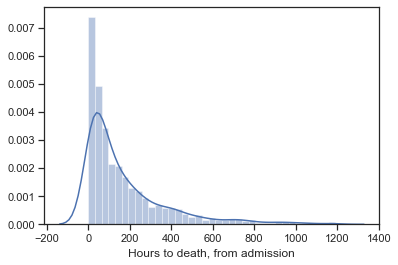

In [21]:
# plot time to death
sns.distplot(dtf["time_to_die"].values / 60)
plt.xlabel("Hours to death, from admission")

### 3 - Creation of numerical age

In [22]:
def get_age(td):
    # returns years 
    return np.floor(np.abs(td.days)/365)

def process_diagnosis(s,level=2):
    # takes a diagnosis code and returns only the first level items.
    # E.g. "1.1" is Respiratory (Surgical), while "1" is just Surgical and "2" non-Surgical.
    if not s or type(s) != str: # !!!
        return np.nan
    s = s.split(".")
    return ".".join(s[:level])

Another __feature engineering__ operation, obtaining the age of the patients based on the DOB (date of birth) feature. It is necessary remove the time_arrive feature (which acts as a reference time stamp) to get the actual age of the patients. Age is obtained by transforming this elapsed time feature (time_from_birth) to years. Notice that not all patients got their date of birth recorded.

In [23]:
# get AGE using DOB
dtf["time_of_birth"] = dtf["DOB"].apply(export_datetime)
dtf["time_from_birth"] = dtf["time_arrive"] - dtf["time_of_birth"]
dtf["age"] = dtf["time_from_birth"].apply(get_age)
dt["time_of_birth"] = dt["DOB"].apply(export_datetime)
dt["time_from_birth"] = dt["time_arrive"] - dt["time_of_birth"]
dt["age"] = dt["time_from_birth"].apply(get_age)
dt["age"].head()

0     NaN
1     NaN
3     NaN
4     NaN
5    76.0
Name: age, dtype: float64

Text(0.5, 0, 'Age at admission (years)')

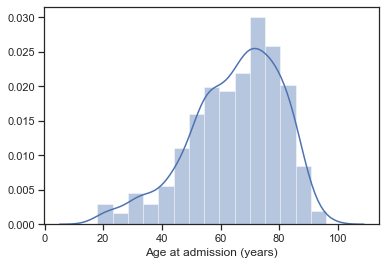

In [24]:
# age distribution
sns.distplot(dtf[~pd.isna(dtf.age)]["age"].values)
plt.xlabel("Age at admission (years)")

Joint empirical distribution of the age of the patients and the time of death in the ICU

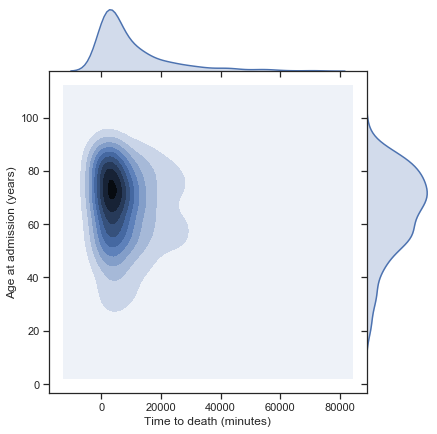

In [25]:
sns.jointplot(dtf[~pd.isna(dtf.age)]["time_to_die"].values, dtf[~pd.isna(dtf.age)]["age"].values, kind="kde", height=6, space=0).set_axis_labels("Time to death (minutes)","Age at admission (years)")

### 4 - Simplified RAICU and OCPMH codes

We create a simplified version of the RAICU1, RAICU2 and OCPMH codes based only on the first two digits of the code (whether the patients needed surgery or not, and the type of problem e.g. respiratory, psichiatry, etc).

In [26]:
# process reasons for admission (taxonomy)
dtf["RAICU1_trim"] = dtf["RAICU1"].apply(process_diagnosis)
dtf["RAICU2_trim"] = dtf["RAICU2"].apply(process_diagnosis)
dtf["OCPMH_trim"] = dtf["OCPMH"].apply(process_diagnosis)
dt["RAICU1_trim"] = dt["RAICU1"].apply(process_diagnosis)
dt["RAICU2_trim"] = dt["RAICU2"].apply(process_diagnosis)
dt["OCPMH_trim"] = dt["OCPMH"].apply(process_diagnosis)

In [27]:
dtf[['RAICU2_trim','RAICU2']].head()

,RAICU2_trim,RAICU2
0,2.3,2.3.7
1,2.1,2.1.4
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN


Text(0.5, 8.95999999999998, 'Primary diagnosis')

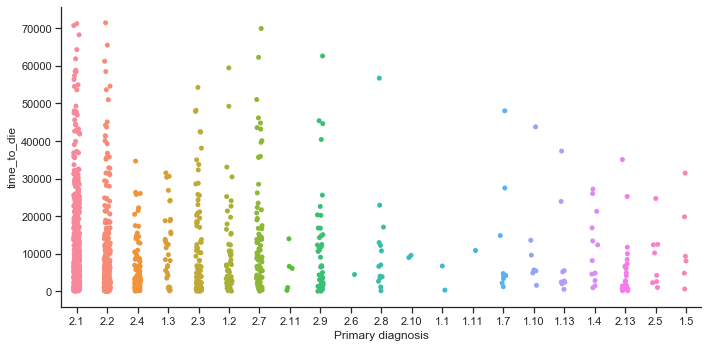

In [28]:
# main diagnosis vs time to die 
sns.catplot(x="RAICU1_trim", y="time_to_die", data=dtf, height=5, aspect=2)#, kind="swarm")
plt.xlabel("Primary diagnosis")

Text(0.5, 8.95999999999998, 'Secondary diagnosis')

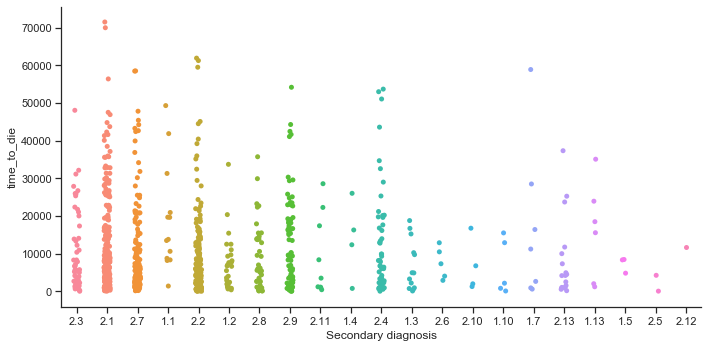

In [29]:
# secondary diagnosis vs time to die 
sns.catplot(x="RAICU2_trim", y="time_to_die", data=dtf, height=5, aspect=2)#, kind="swarm")
plt.xlabel("Secondary diagnosis")

Text(0.5, 8.95999999999998, 'Previous diagnosis')

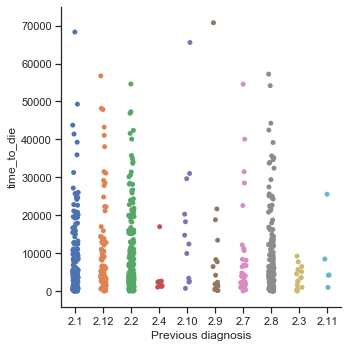

In [30]:
# other past diagnosis vs time to die 
sns.catplot(x="OCPMH_trim", y="time_to_die", data=dtf)#, kind="swarm")
plt.xlabel("Previous diagnosis")

We transform all categorical variables into indicator one hot variables (from all possible representation of those variables). This is a __feature enginneering__ step.

In [31]:
# make variables categorical
dummied = ["RAICU1_trim","RAICU2_trim","OCPMH_trim","SOHA","SEX","RESA","HLOCA","LOCA","PA_V3","SCODE","CLASSNS","PLOCA","TYPEIHA","CCA","CPR_V3","DEP","TNESSA","ITW_V3","OD_V3"]
dtf_final = pd.get_dummies(dtf, columns=dummied, dummy_na=False)
dt_final = pd.get_dummies(dt, columns=dummied, dummy_na=False)

Distribution of the age of the patients admitted to the ICU

### 5 - Rows and features removal

Here the analyst looks for the most correlated variables in the data with the time_to_die target variable

In [32]:
def get_target_corr_variables(df,target,threshold):

    corr_matrix = df.dropna(thresh=0.80*len(dtf_final), axis=1).corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    s = upper.unstack()

    c = 0
    for i in s[target].index:    
        corr = float(s[target][c])
        if np.isnan(corr):
            corr = 0
            
        if corr>threshold:
            print (i,'correlation with '+target+' of: ', round(corr,3))
        c +=1


In [33]:
get_target_corr_variables(dtf_final,'time_to_die',0.7)

CCL3D correlation with time_to_die of:  0.899
ARSD correlation with time_to_die of:  0.833
BCSD correlation with time_to_die of:  0.864
GSD correlation with time_to_die of:  0.809


In [34]:
get_target_corr_variables(dt_final,'time_to_die',0.7)

CCL3D correlation with time_to_die of:  0.899
ARSD correlation with time_to_die of:  0.833
BCSD correlation with time_to_die of:  0.864
GSD correlation with time_to_die of:  0.809


In [35]:
get_target_corr_variables(dtf_final,'survival_class',0.7)

In [36]:
get_target_corr_variables(dt_final,'survival_class',0.7)

In the time series data we are using the first 10 hours of vitals recorded at the ICU, therefore we need to drop all patients that lived less than those 10 hours.

In [37]:
# drop all patients that didnt live 10 hours
print(dtf_final.shape)
dtf_final = dtf_final[dtf_final['time_to_die']>60*10]
print(dtf_final.shape)

(1730, 650)
(1586, 650)


Remove time_to_die variable.

In [38]:
dtf_final.drop(["time_to_die"], axis=1).shape

(1586, 649)

Drop variables that can leak information about the targets, that are filled after the patient died or variables with unseful information.

In [39]:
columns_to_drop = ["time_arrive_hospital",'REFOD','BCSD','DSD','ARSD','BRSD','ACSD',"GSD",'DHRS',\
                   'ORGAN_SUPPORT','NSD','LSD','RSD','CCL3D','CCL2D',"time_from_birth","time_of_birth",\
                   "SOHD","DWFRD","TWFRD","UDIS","DDICU","DDH","HDIS","RESD","UHDIS","URAICU","DDBSD","TDBSD",\
                   "pid","spell","index","ADNO","ICNNO","bed02","bed03","bed05","time_arrive","time_death",\
                   "HCMEST","WKGEST","DAH","DAICU","DIS","DOAH","DOAICU","DLCCA","DTW","TTW","DOB","DOD",\
                   "TOD","TBRICU","DBRICU","RAICU1","RAICU2","OCPMH","ITW_V3_B","ITW_V3_H","ITW_V3_N",\
                   "ITW_V3_W","OD_V3_H","OD_V3_N","OD_V3_O","OD_V3_T","BSDTP","AMUAI",'apache_score','apache_prob']

In [40]:
# drop columns not needed for predictions
print(dtf_final.shape)
dtf_final.drop(columns=columns_to_drop,inplace=True)
print(dtf_final.shape)
print(dt_final.shape)
dt_final.drop(columns=columns_to_drop,inplace=True)
print(dt_final.shape)

(1586, 650)
(1586, 581)
(1730, 250)
(1730, 181)


### 6 - Analyzing non-stationarity

Variable HCM (heigth in cm) presents two different modes according to which hospital measured it (some of them in metres, some inn centimetres).
We transform this variable to centimetres in both data frames

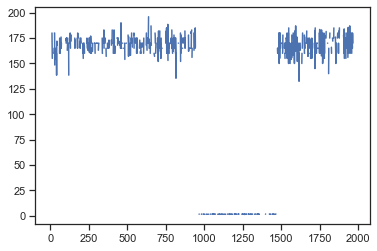

In [41]:
plt.plot(dt_final['HCM'])

In [42]:
dt_final['HCM'][dt_final['HCM']<100] *= 100
dtf_final['HCM'][dtf_final['HCM']<100] *= 100

/Users/anazabal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/anazabal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


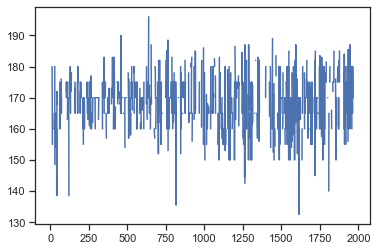

In [43]:
plt.plot(dt_final['HCM'])

Many variables indicating whether a test was performed or not (e.g. CHEMOX) are indicator variables with two different encodings for "test not performed": 0 or NaN. We need to transform these missing values to 0 to canonicalize the variable.

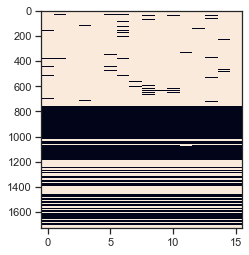

In [44]:
#Here, white indicates Nan, and black observed
variables = ['CHEMOX','RADIOX','CICIDS','AMLALLMM','CMLCLL','LYM','META','CRRX','BPC',
             'HE','PH','AIDS_V3','HV','SRD','STERX','VSCD']
plt.imshow(dt_final[variables].isnull(),aspect=0.01)

In [45]:
#Example with 1 and NaN
print(dt_final[variables].iloc[380])

CHEMOX      1.0
RADIOX      NaN
CICIDS      NaN
AMLALLMM    NaN
CMLCLL      NaN
LYM         1.0
META        NaN
CRRX        NaN
BPC         NaN
HE          NaN
PH          NaN
AIDS_V3     NaN
HV          NaN
SRD         NaN
STERX       NaN
VSCD        NaN
Name: 434, dtype: float64


In [46]:
#Example with 1 and 0
print(dt_final[variables].iloc[830])

CHEMOX      0.0
RADIOX      0.0
CICIDS      0.0
AMLALLMM    0.0
CMLCLL      0.0
LYM         0.0
META        0.0
CRRX        0.0
BPC         1.0
HE          0.0
PH          1.0
AIDS_V3     0.0
HV          0.0
SRD         0.0
STERX       0.0
VSCD        0.0
Name: 958, dtype: float64


In [47]:
dt_final[variables] = dt_final[variables].fillna(0)
dtf_final[variables] = dtf_final[variables].fillna(0)

### 6 - Missing data

Note by analyst: Remove variables where more than 50% of missing values, this are mostily time series vitals that are not recorded for every patient (go back to this point later)

In [48]:
# remove infinites
dtf_final.replace([np.inf, -np.inf], np.nan,inplace=True)
dt_final.replace([np.inf, -np.inf], np.nan,inplace=True)

In [49]:
# remove variables with more than 50% of empty values
dtf_final.dropna(thresh=0.50*len(dtf_final), axis=1,inplace=True)
dt_final.dropna(thresh=0.50*len(dt_final), axis=1,inplace=True)

print(dtf_final.shape)
print(dt_final.shape)

(1586, 375)
(1730, 178)


Impute the rest of the missing values with "-1"

In [50]:
# dealing with nans by turning them all to -1 (definitely suboptimal!)
dtf_final[dtf_final.isna()] = -1
dt_final[dt_final.isna()] = -1

print(dtf_final.shape)
print(dt_final.shape)

(1586, 375)
(1730, 178)


In summary, the __missing data__ treatment was done two fold. First, if features were missing by more that 50% they were deleted from the data (__data trasformations__). Second, for the remaining missing data, those values were imputed with a -1.

## Data Modelling 

### Regression modeling on the time to die:

Prepare input features, drop target variables

In [51]:
dtf_final_X = dtf_final.drop(["time_to_die",'survival_class'], axis=1)
dt_final_X = dt_final.drop(["time_to_die",'survival_class'], axis=1)

print(dtf_final_X.shape)
print(dt_final_X.shape)

dtf_final_X.head()

(1586, 373)
(1730, 176)


,HCM,WKG,PSP,CHEMOX,RADIOX,CICIDS,AMLALLMM,CMLCLL,LYM,META,CRRX,BPC,HE,PH,AIDS_V3,HV,SRD,STERX,VSCD,h_rate_mean,h_rate_std,h_rate_last,h_rate_mean_tail_diff,h_rhythm_mean,h_rhythm_std,h_rhythm_last,h_rhythm_mean_tail_diff,bp_m_a_mean,bp_m_a_std,bp_m_a_last,bp_m_a_mean_tail_diff,bp_m_ni_mean,bp_m_ni_last,bp_m_ni_mean_tail_diff,bp_sys_a_mean,bp_sys_a_std,bp_sys_a_last,bp_sys_a_mean_tail_diff,bp_sys_ni_mean,bp_sys_ni_last,bp_sys_ni_mean_tail_diff,bp_dia_a_mean,bp_dia_a_std,bp_dia_a_last,bp_dia_a_mean_tail_diff,bp_dia_ni_mean,venous_p_mean,lactate_abg_mean,lactate_abg_std,lactate_abg_last,lactate_abg_mean_tail_diff,spo2_mean,spo2_std,spo2_last,spo2_mean_tail_diff,sao2_abg_mean,sao2_abg_std,sao2_abg_last,sao2_abg_mean_tail_diff,pao2_abg_mean,pao2_abg_std,pao2_abg_last,pao2_abg_mean_tail_diff,paco2_abg_mean,paco2_abg_std,paco2_abg_last,paco2_abg_mean_tail_diff,ph_abg_vbg_mean,ph_abg_vbg_std,ph_abg_vbg_last,ph_abg_vbg_mean_tail_diff,hco3_abg_vbg_mean,hco3_abg_vbg_std,hco3_abg_vbg_last,hco3_abg_vbg_mean_tail_diff,temperature_central_mean,position_mean,position_last,position_mean_tail_diff,ventilation_mean,ventilation_std,ventilation_last,ventilation_mean_tail_diff,respiratory_rate_totl_mean,respiratory_rate_totl_std,respiratory_rate_totl_last,respiratory_rate_totl_mean_tail_diff,total_resp_rate_mean,total_resp_rate_std,total_resp_rate_last,total_resp_rate_mean_tail_diff,mand_resp_rate_mean,minute_volume_mean,minute_volume_std,minute_volume_last,minute_volume_mean_tail_diff,airway_pressure_peak_mean,fraction_oxygen_mean,fraction_oxygen_std,fraction_oxygen_last,fraction_oxygen_mean_tail_diff,pe_expiratory_pressure_mean,pe_expiratory_pressure_std,pe_expiratory_pressure_last,pe_expiratory_pressure_mean_tail_diff,gcs_total_mean,gcs_total_std,gcs_total_last,gcs_total_mean_tail_diff,gcs_motor_mean,gcs_motor_std,gcs_motor_last,gcs_motor_mean_tail_diff,gcs_eye_mean,gcs_eye_std,gcs_eye_last,gcs_eye_mean_tail_diff,gcs_verbal_mean,gcs_verbal_std,gcs_verbal_last,gcs_verbal_mean_tail_diff,sedation_score_mean,sedation_score_std,sedation_score_last,sedation_score_mean_tail_diff,urine_output_mean,urine_output_std,urine_output_last,urine_output_mean_tail_diff,urea_mean,urea_last,urea_mean_tail_diff,creatinine_mean,creatinine_last,creatinine_mean_tail_diff,sodium_mean,sodium_last,sodium_mean_tail_diff,sodium_abg_vbg_mean,sodium_abg_vbg_std,sodium_abg_vbg_last,sodium_abg_vbg_mean_tail_diff,potassium_mean,potassium_last,potassium_mean_tail_diff,potassium_abg_vbg_mean,potassium_abg_vbg_std,potassium_abg_vbg_last,potassium_abg_vbg_mean_tail_diff,bilirubin_mean,bilirubin_last,bilirubin_mean_tail_diff,glucode_abg_vbg_mean,glucode_abg_vbg_last,glucode_abg_vbg_mean_tail_diff,haemoglobin_abg_vbg_mean,haemoglobin_abg_vbg_std,haemoglobin_abg_vbg_last,haemoglobin_abg_vbg_mean_tail_diff,haemoglobin_mean,haemoglobin_last,haemoglobin_mean_tail_diff,white_cell_mean,white_cell_last,white_cell_mean_tail_diff,neutrophil_mean,neutrophil_last,neutrophil_mean_tail_diff,platelets_mean,platelets_last,platelets_mean_tail_diff,fluid_balance_h_mean,fluid_balance_h_last,fluid_balance_h_mean_tail_diff,respiratory_rate_spon_mean,respiratory_rate_spon_std,respiratory_rate_spon_last,respiratory_rate_spon_mean_tail_diff,cprotein_mean,cprotein_last,cprotein_mean_tail_diff,sedataion_mean,pao2_fio2_mean,pao2_fio2_std,pao2_fio2_last,pao2_fio2_mean_tail_diff,fluid_balance_d_mean,fluid_balance_d_last,fluid_balance_d_mean_tail_diff,advsupt_resp_mean,advsupt_resp_last,advsupt_resp_mean_tail_diff,basicsupt_resp_mean,basicsupt_resp_last,basicsupt_resp_mean_tail_diff,advsupt_cardv_mean,advsupt_cardv_last,advsupt_cardv_mean_tail_diff,basicsupt_cardv_mean,basicsupt_cardv_last,basicsupt_cardv_mean_tail_diff,supt_renal_mean,supt_renal_last,supt_renal_mean_tail_diff,supt_neuro_mean,supt_neuro_last,supt_neuro_mean_tail_diff,supt_liver_mean,supt_liver_last,supt_liver_mean_tail_diff,supt_dermat_mean,supt_dermat_last,supt_dermat_mean_tail_diff,supt_gastr_mean,supt_gastr_last,supt_gastr_mean_tail_diff,time

In [52]:
# Prepare target data

# all data
y = dtf_final["time_to_die"].values
X = dtf_final_X.values

# no TS data
y_nts = dt_final["time_to_die"].values
X_nts = dt_final_X.values

In [53]:
print(X.shape, y.shape)
print(X_nts.shape, y_nts.shape)

(1586, 373) (1586,)
(1730, 176) (1730,)


Split datasets into training/testing samples

In [54]:
from sklearn.model_selection import train_test_split

# all data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# no TS data
X_nts_train, X_nts_test, y_nts_train, y_nts_test = train_test_split(X_nts, y_nts, test_size=0.20, random_state=42)

In [55]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1268, 373) (318, 373) (1268,) (318,)


In [56]:
# apply transformations to data: standardize X

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# all data
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

# no TS data
X_nts_scaler = StandardScaler()
y_nts_scaler = StandardScaler()
X_nts_train = X_nts_scaler.fit_transform(X_nts_train)
X_nts_test = X_nts_scaler.transform(X_nts_test)

In [57]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1268, 373) (318, 373) (1268,) (318,)


Build a ElasticNet regression model and use grid search to tune the parameters.

First, build a model on the demographic only data:

In [58]:
# Grid search for best parameters
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import explained_variance_score, r2_score


# Set the parameters by cross-validation
tuned_parameters = [{'alpha': [0.1,0.5,1.0,5.0],'l1_ratio': [0.1,0.3,0.5,0.7,0.9]}]

clf = GridSearchCV(ElasticNet(), tuned_parameters, cv=5)
clf.fit(X_nts_train, y_nts_train)
print("Best parameters set found on development set:")
print(clf.best_params_)
print("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

    
    
print ('Training metrics:')
y_nts_true, y_nts_pred = y_nts_train, clf.best_estimator_.predict(X_nts_train)
print('explained variance: ',explained_variance_score(y_nts_true, y_nts_pred))
print ('r2: ',r2_score(y_nts_true, y_nts_pred))

print()
print ('Testin metrics:')
y_nts_true, y_nts_pred = y_nts_test, clf.best_estimator_.predict(X_nts_test)
print('explained variance: ',explained_variance_score(y_nts_true, y_nts_pred))
print ('r2: ',r2_score(y_nts_true, y_nts_pred))

Best parameters set found on development set:
{'alpha': 5.0, 'l1_ratio': 0.5}
Grid scores on development set:
-0.059 (+/-0.137) for {'alpha': 0.1, 'l1_ratio': 0.1}
-0.066 (+/-0.143) for {'alpha': 0.1, 'l1_ratio': 0.3}
-0.075 (+/-0.150) for {'alpha': 0.1, 'l1_ratio': 0.5}
-0.084 (+/-0.159) for {'alpha': 0.1, 'l1_ratio': 0.7}
-0.097 (+/-0.173) for {'alpha': 0.1, 'l1_ratio': 0.9}
-0.002 (+/-0.086) for {'alpha': 0.5, 'l1_ratio': 0.1}
-0.010 (+/-0.094) for {'alpha': 0.5, 'l1_ratio': 0.3}
-0.023 (+/-0.106) for {'alpha': 0.5, 'l1_ratio': 0.5}
-0.042 (+/-0.122) for {'alpha': 0.5, 'l1_ratio': 0.7}
-0.074 (+/-0.150) for {'alpha': 0.5, 'l1_ratio': 0.9}
0.016 (+/-0.064) for {'alpha': 1.0, 'l1_ratio': 0.1}
0.011 (+/-0.071) for {'alpha': 1.0, 'l1_ratio': 0.3}
0.002 (+/-0.082) for {'alpha': 1.0, 'l1_ratio': 0.5}
-0.016 (+/-0.099) for {'alpha': 1.0, 'l1_ratio': 0.7}
-0.055 (+/-0.134) for {'alpha': 1.0, 'l1_ratio': 0.9}
0.022 (+/-0.028) for {'alpha': 5.0, 'l1_ratio': 0.1}
0.024 (+/-0.032) for {'alpha':

Build a model on the demographic + time series data:

In [59]:

# Set the parameters by cross-validation
tuned_parameters = [{'alpha': [0.1,0.5,1.0,5.0],'l1_ratio': [0.1,0.3,0.5,0.7,0.9]}]

clf = GridSearchCV(ElasticNet(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print(clf.best_params_)
print("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

    
    
print ('Training metrics:')
y_true, y_pred = y_train, clf.best_estimator_.predict(X_train)
print('explained variance: ',explained_variance_score(y_true, y_pred))
print ('r2: ',r2_score(y_true, y_pred))

print()
print ('Testin metrics:')
y_true, y_pred = y_test, clf.best_estimator_.predict(X_test)
print('explained variance: ',explained_variance_score(y_true, y_pred))
print ('r2: ',r2_score(y_true, y_pred))

Best parameters set found on development set:
{'alpha': 5.0, 'l1_ratio': 0.7}
Grid scores on development set:
-0.093 (+/-0.197) for {'alpha': 0.1, 'l1_ratio': 0.1}
-0.125 (+/-0.223) for {'alpha': 0.1, 'l1_ratio': 0.3}
-0.170 (+/-0.271) for {'alpha': 0.1, 'l1_ratio': 0.5}
-0.244 (+/-0.378) for {'alpha': 0.1, 'l1_ratio': 0.7}
-0.401 (+/-0.696) for {'alpha': 0.1, 'l1_ratio': 0.9}
0.063 (+/-0.138) for {'alpha': 0.5, 'l1_ratio': 0.1}
0.045 (+/-0.142) for {'alpha': 0.5, 'l1_ratio': 0.3}
0.017 (+/-0.147) for {'alpha': 0.5, 'l1_ratio': 0.5}
-0.034 (+/-0.164) for {'alpha': 0.5, 'l1_ratio': 0.7}
-0.169 (+/-0.270) for {'alpha': 0.5, 'l1_ratio': 0.9}
0.096 (+/-0.128) for {'alpha': 1.0, 'l1_ratio': 0.1}
0.087 (+/-0.132) for {'alpha': 1.0, 'l1_ratio': 0.3}
0.070 (+/-0.137) for {'alpha': 1.0, 'l1_ratio': 0.5}
0.033 (+/-0.144) for {'alpha': 1.0, 'l1_ratio': 0.7}
-0.079 (+/-0.187) for {'alpha': 1.0, 'l1_ratio': 0.9}
0.087 (+/-0.082) for {'alpha': 5.0, 'l1_ratio': 0.1}
0.094 (+/-0.091) for {'alpha': 5.0

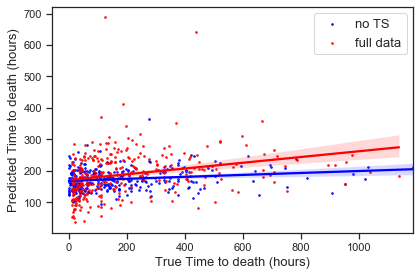

In [60]:
# Visualisation of the results from the modeling
sns.regplot(y_nts_true/60,y_nts_pred/60, label="no TS", marker='o', color='blue', scatter_kws={'s':3})
sns.regplot(y_true/60,y_pred/60, label="full data", marker='o', color='red', scatter_kws={'s':3})
plt.xlabel("True Time to death (hours)",fontsize=13)
plt.ylabel("Predicted Time to death (hours)",fontsize=13)
plt.legend(fontsize=13)

plt.tight_layout()
# plt.savefig(os.path.join(results_folder,"elasticNet_evaluation.pdf"))

For both datasets, ElasticNet fails to find a model that would predict accurately the time of death based on the input features. 


The avalaible features might not be good enought to precisely predict when the patient is going to die, but it might be able to classify which patients will die inminently after their admition on the ICU (whithin th first 100 hours).
This is explored in the following cells.

### Classification the survival potential on the first 100 hours:

The dataset is almost divided in half with patients that survive the first 100 hours from admition to the ICU, and the patients that doesnt. 

In [61]:
print ("Demographic only data")
print ('Class 1: time of death within 100 hours',round(dt_final[dt_final["survival_class"]==1].shape[0]/dt_final.shape[0],3))
print ('Class 2: time of death after 100 hours',round(dt_final[dt_final["survival_class"]==0].shape[0]/dt_final.shape[0],3))
print ()
print ("Demographic plus time series data")
print ('Class 1: time of death within 100 hours',round(dtf_final[dtf_final["survival_class"]==1].shape[0]/dtf_final.shape[0],3))
print ('Class 2: time of death after 100 hours',round(dtf_final[dtf_final["survival_class"]==0].shape[0]/dtf_final.shape[0],3))

Demographic only data
Class 1: time of death within 100 hours 0.513
Class 2: time of death after 100 hours 0.487

Demographic plus time series data
Class 1: time of death within 100 hours 0.469
Class 2: time of death after 100 hours 0.531


In [62]:
# Prepare input features, drop target variables

#  Demographic + time series data
y = dtf_final["survival_class"].values
dtf_final_X = dtf_final.drop(["time_to_die",'survival_class'], axis=1)
X_columns = dtf_final_X.columns
X = dtf_final_X.values

# Only demographic data
y_nts = dt_final["survival_class"].values
dt_final_X = dt_final.drop(["time_to_die",'survival_class'], axis=1)
X_nts_columns = dt_final_X.columns
X_nts = dt_final_X.values

In [63]:
#split training and testing datasets

# demographic + time series data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# demographic only data
X_nts_train, X_nts_test, y_nts_train, y_nts_test = train_test_split(X_nts, y_nts, test_size=0.20, random_state=42)

In [64]:
# apply transformations to data: standardize X

from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

# no TS data
X_nts_scaler = StandardScaler()
y_nts_scaler = StandardScaler()
X_nts_train = X_nts_scaler.fit_transform(X_nts_train)
X_nts_test = X_nts_scaler.transform(X_nts_test)

In [65]:
# function to build a classification figure
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    import itertools
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Build a Random forest classification model and use grid search to tune the parameters.

First, build a the model on the demographic only data:

In [66]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Create a Gaussian Classifier
clf_nts=RandomForestClassifier(n_estimators=100)

# use a full grid over all parameters
param_grid = {"max_depth": [3, 10,100,None],
              "max_features": [10,50,100,None],
              "min_samples_split": [2, 3, 10,20],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search_nts = GridSearchCV(clf_nts, param_grid=param_grid, cv=3)

#Train the model using the training sets y_pred=clf.predict(X_test)
grid_search_nts.fit(X_nts_train,y_nts_train)

y_nts_true, y_nts_pred = y_nts_test, grid_search_nts.best_estimator_.predict(X_nts_test)

print('Training metrics:')
y_true, y_pred = y_nts_train, grid_search_nts.best_estimator_.predict(X_nts_train)
print("Accuracy:",metrics.accuracy_score(y_true, y_pred))

print('Testing metrics:')
y_true, y_pred = y_nts_test, grid_search_nts.best_estimator_.predict(X_nts_test)
print("Accuracy:",metrics.accuracy_score(y_true, y_pred))

Training metrics:
Accuracy: 0.8005780346820809
Testing metrics:
Accuracy: 0.5289017341040463


Normalized confusion matrix
[[0.38 0.62]
 [0.3  0.7 ]]


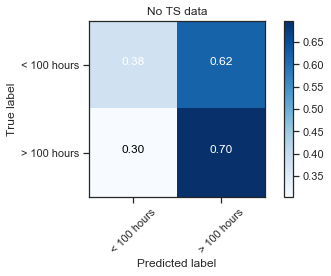

In [67]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_nts_test, y_nts_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['< 100 hours','> 100 hours'],
                      title='No TS data', normalize=True)
# plt.savefig(os.path.join(results_folder,"demographicOnly_classification.pdf"))
plt.show()

The most important features in the demographic only model: 

In [68]:
feature_importances_nts = pd.DataFrame(grid_search_nts.best_estimator_.feature_importances_,
                                   X_nts_columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances_nts.head(10)

,importance
WKG,0.072607
time_to_ICU,0.055230
HCM,0.044993
RAICU1_trim_2.1,0.031060
META,0.025920
PA_V3_U,0.018804
CCA_N,0.017539
CPR_V3_H,0.017328
LOCA_E,0.017291
SCODE_192.0,0.016933


The model performance barely improves from a baseline dummy model with an average accuracy of 55%.

Now, lets build a the model on the demographic + time series data:

In [69]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

# use a full grid over all parameters
param_grid = {"max_depth": [3, 10,100,None],
              "max_features": [10,50,100,None],
              "min_samples_split": [2, 3, 10,20],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=3)

#Train the model using the training sets y_pred=clf.predict(X_test)
grid_search.fit(X_train,y_train)

print('Training metrics:')
y_true, y_pred = y_train, grid_search.best_estimator_.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_true, y_pred))

print('Testing metrics:')
y_true, y_pred = y_test, grid_search.best_estimator_.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_true, y_pred))


Training metrics:
Accuracy: 1.0
Testing metrics:
Accuracy: 0.7138364779874213


Normalized confusion matrix
[[0.75 0.25]
 [0.33 0.67]]


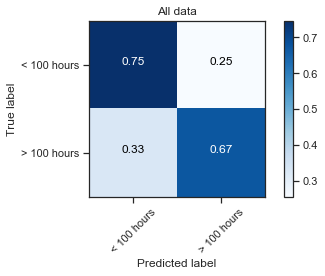

In [70]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['< 100 hours','> 100 hours'],
                      title='All data', normalize=True)
# plt.savefig(os.path.join(results_folder,"demographicPlusTS_classification.png"))
plt.show()


The most important features in the demographic + time series model: 

In [71]:
feature_importances = pd.DataFrame(grid_search.best_estimator_.feature_importances_,
                                   X_columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances.head(10)

,importance
h_rate_mean,0.012311
lactate_abg_mean,0.011469
fraction_oxygen_mean,0.010449
lactate_abg_last,0.009514
bp_sys_a_mean,0.009143
sedation_score_mean,0.009130
sedation_score_mean_tail_diff,0.009002
lactate_abg_std,0.008682
urine_output_mean,0.008561
hco3_abg_vbg_mean,0.008499


Including the time series data from the first 10 hours of vitals significantly increases the the classification accuracy on the prediction of episodes where the patient dies on the first 100 hours of admition (in this analysis all of these patients have lived a minimum of 10 hours).
Taking this results into consideration, a more sofisticated survival model could be explored in the future.